In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
#filepath = "../data_f1db/f1db-races-qualifying-results.csv"

filepath = input("Please enter the filepath of the qualifying data you want to use: ")

df = pd.read_csv(filepath)  #reading in the data that has all the qualifinig results

In [4]:
data1 = df[df['year'] > 1984]
data1 = data1[data1['year'] < 2025]  # making sure that we only use races from 1985 to 2024. 

raceId_list = data1['raceId'].unique() #creating a list of all the unique race Id's that we will be using

In [5]:
data1["Fastest_Qual_time"] = data1[["timeMillis","q1Millis","q2Millis","q3Millis"]].min(axis =1)  #This pick the fastest time of the three qualification times, accounting for races before 2005
                        #that didn't have three qualifying times listed, just one. 

In [6]:
gap_between_mean = []
gap_between_median =[]
gap_between_std = []
gap_between_var = []
gap_between_first_four = []
gap_between_average = []

fastsest_gap_first_ten = []

for j in raceId_list:
    small_set = data1[data1["raceId"] == j]
    small_set = small_set.sort_values(by = "Fastest_Qual_time",ascending = True)

    gap_between_list = []
    gap_fastest_list = []
    for i in range(len(small_set)):
        if i == 0:
            gap = 0;
        else:
            gap = np.abs(float(small_set["Fastest_Qual_time"].iloc[i] - small_set["Fastest_Qual_time"].iloc[i-1]))  #taking the absolute value between each racer's fastest time.

        fast_gap = float(small_set["Fastest_Qual_time"].iloc[i] - small_set["Fastest_Qual_time"].iloc[0]) #this calculates the gap time compared to the fastest time. 
        
        gap_fastest_list.append(fast_gap)    #creats a list of gap times from the fastest lap.
        gap_between_list.append(gap)    #creates a list of the gap time between each fastest lap. 
        
    
    gap_between_mean.append(np.nanmean(gap_between_list))  # I had to add the 'nan' before each arithmetic operation, or else if there was a 'NaN' value, meaning someone didn't get any time for qualification
    gap_between_median.append(np.nanmedian(gap_between_list))       #The stats for that race with the 'NaN' qual time would also be 'NaN' which left some gaps in the data. 
    gap_between_std.append(np.nanstd(gap_between_list))
    gap_between_var.append(np.nanvar(gap_between_list))
    gap_between_average.append(np.nansum(gap_between_list)/len(gap_between_list))

    gap_between_first_four.append( sum(gap_between_list[:4])/4) 

    tenth = gap_fastest_list[9] if len(gap_fastest_list) > 10 else gap_fastest_list[-1] #finds the 10th fastest qual time if available, or the last in the list, if less than 10 people really qualify. 
    
    fastsest_gap_first_ten.append(tenth)  #this tells us the time gap between the fastest qual lap, and the 10th fastest. 

gap_data = pd.DataFrame({
    "raceId":raceId_list,
    #"Bgap": gap_between_list,
    "Bgap_mean": gap_between_mean,
    "Bgap_median": gap_between_median,
    "Bgap_std":gap_between_std,
    "Bgap_var":gap_between_var,
    "First_ten_gap":fastsest_gap_first_ten,
    "Bgap_average":gap_between_average
})

gap_data.to_csv("Fastest Qual time gaps (No DNF).csv",index = False)

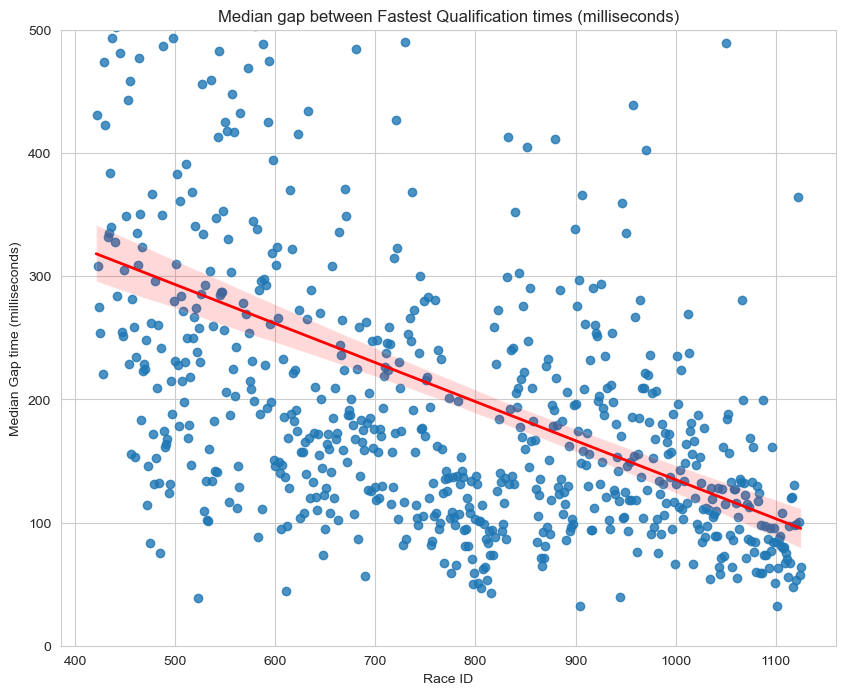

In [7]:
plt.rcParams["figure.figsize"] = (10,8)
sns.regplot(data = gap_data,
                x = "raceId",
                y = "Bgap_median",
                line_kws= {'color':'red', "linewidth" : 2},
                order = 1)
plt.ylim(0,500)
#plt.axvline(x = 955, color = 'black')
plt.title("Median gap between Fastest Qualification times (milliseconds)")
plt.xlabel("Race ID")
plt.ylabel("Median Gap time (milliseconds)")
plt.savefig("Median Gap Time.png")

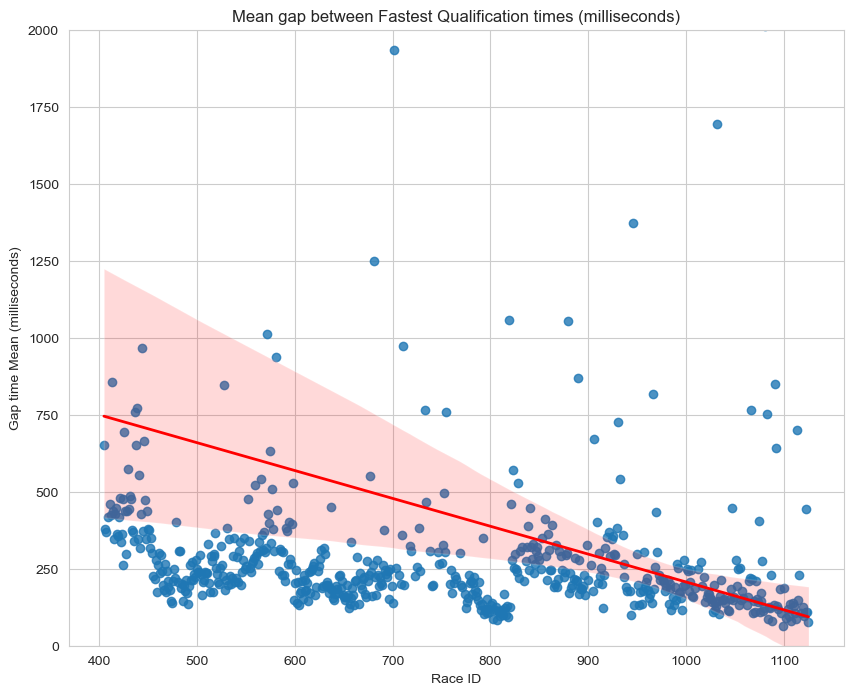

In [159]:
plt.rcParams["figure.figsize"] = (10,8)
sns.regplot(data = gap_data,
                x = "raceId",
                y = "Bgap_mean",
                line_kws= {'color':'red', "linewidth" : 2},
                order = 1)
plt.ylim(0,2000)
#plt.axvline(x = 955, color = 'black')
plt.title("Mean gap between Fastest Qualification times (milliseconds)")
plt.xlabel("Race ID")
plt.ylabel("Gap time Mean (milliseconds)")
plt.savefig("Mean Gap Time.png")

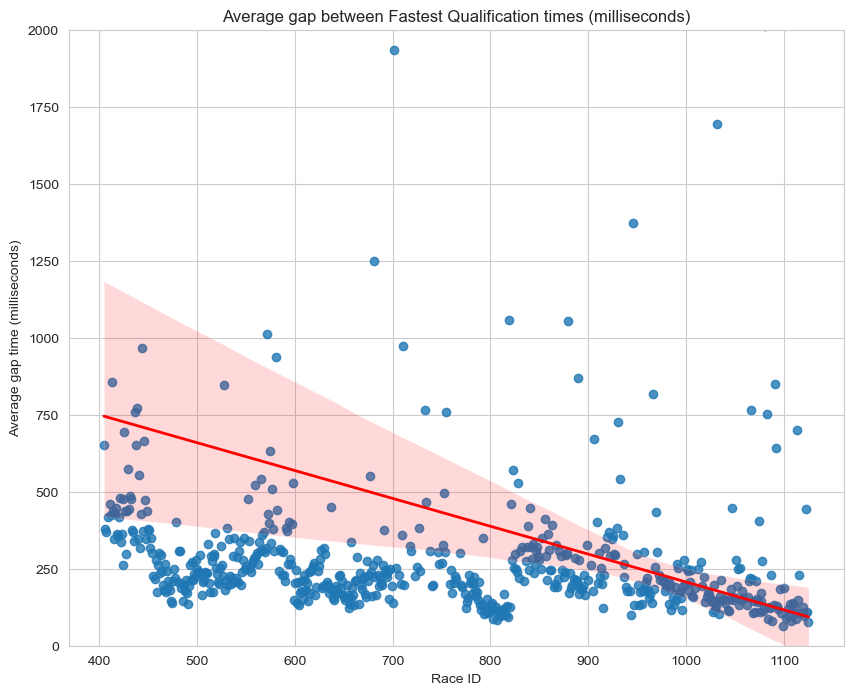

In [157]:
plt.rcParams["figure.figsize"] = (10,8)
sns.regplot(data = gap_data,
                x = "raceId",
                y = "Bgap_average",
                line_kws= {'color':'red', "linewidth" : 2},
                order = 1)
plt.ylim(0,2000)
#plt.axvline(x = 955, color = 'black')
plt.title("Average gap between Fastest Qualification times (milliseconds)")
plt.xlabel("Race ID")
plt.ylabel("Average gap time (milliseconds)")
plt.savefig("Average Gap Time.png")

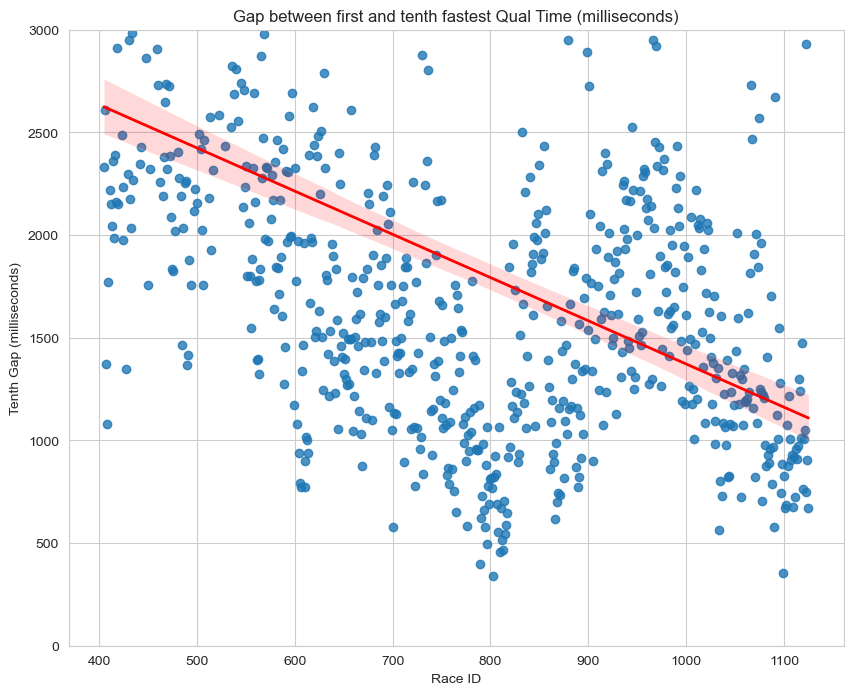

<Figure size 1000x800 with 0 Axes>

In [155]:
plt.rcParams["figure.figsize"] = (10,8)
sns.regplot(data = gap_data,
                x = "raceId",
                y = "First_ten_gap",
                line_kws= {'color':'red', "linewidth" : 2},
                order = 1)
plt.ylim(0,3000)
#plt.axvline(x = 955, color = 'black')
plt.title("Gap between first and tenth fastest Qual Time (milliseconds)")
plt.xlabel("Race ID")
plt.ylabel("Tenth Gap (milliseconds)")
plt.show()
plt.savefig("First 10 gap time.png")